In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

# Set the seed to obtain reproducible results
seed = 94

# Part I

In [36]:
# 1. Develop a script that sequentially:
# - Visualizes the matrix 𝑋 with dimensions (n, p) (n individuals and p variables)
# - Constructs classic statistical indicators: variance, covariance, and standard deviation

import numpy as np

def get_info(X, visualize=False):
    # Display the matrix
    if visualize:
        print("Matrix X:")
        print(X)

    # 1. Mean (by column - variables)
    mean_values = np.mean(X, axis=0)  # axis=0 to calculate the mean by column (variable)
    if visualize:
        print("\nMean (by variable):")
        print(mean_values)

    # 2. Variance (by column - variables)
    variance_values = np.var(X, axis=0)  # axis=0 to calculate variance by column (variable)
    if visualize:
        print("\nVariance (by variable):")
        print(variance_values)

    # 3. Standard deviation (by column - variables)
    std_dev = np.std(X, axis=0)
    if visualize:
        print("\nStandard deviation (by variable):")
        print(std_dev)

    # 4. Covariance matrix
    covariance_matrix = np.cov(X, rowvar=False)  # rowvar=False so each column is a variable
    if visualize:
        print("\nCovariance matrix:")
        print(covariance_matrix)

    return covariance_matrix, mean_values, variance_values, std_dev

# Example of function call
A = np.array([[2, 6, 1], [8, 2, 3], [4, 2, 1], [8, 8, 8]])
cov_matrix, mean_values, variance_values, std_dev = get_info(A, visualize=True)


Matrix X:
[[2 6 1]
 [8 2 3]
 [4 2 1]
 [8 8 8]]

Mean (by variable):
[5.5  4.5  3.25]

Variance (by variable):
[6.75   6.75   8.1875]

Standard deviation (by variable):
[2.59807621 2.59807621 2.86138079]

Covariance matrix:
[[ 9.          0.33333333  7.5       ]
 [ 0.33333333  9.          6.5       ]
 [ 7.5         6.5        10.91666667]]


In [37]:
# 2. Develop a script to implement PCA 

# Function to perform PCA
def pca(X):
    # Step 1: Center the data
    X_centered = X - np.mean(X, axis=0)

    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(X, rowvar=False)

    # Step 3: Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 4: Sort eigenvectors based on descending eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 6: Return eigenvalues, eigenvectors, centered samples, and the value of p,
    # the number of eigenvectors required to form a hyperplane explaining 80% of the variance of the point cloud

    return eigenvalues, eigenvectors, X_centered


It's important to understand that the more eigenvectors we add to our hyperplane, the better it will capture the inertia. This is clearly explained by the decomposition of total inertia as IT = Id(u1) + ... + Id(up). We have arranged our eigenvalues in descending order, along with their associated eigenvectors

# Part II

In [38]:
# Testing the previous code

eigenvalues, eigenvectors, X_centered = pca(A)

print("The eigenvalues are:\n", eigenvalues, "\n\nThe eigenvectors are:\n", eigenvectors, "\n\nThe centered X matrix is:\n", X_centered)

The eigenvalues are:
 [20.07977423  8.67010274  0.1667897 ] 

The eigenvectors are:
 [[-0.51077735 -0.65409341 -0.55791425]
 [-0.44640111  0.75639826 -0.47810849]
 [-0.73473298 -0.00484655  0.67833912]] 

The centered X matrix is:
 [[-3.5   1.5  -2.25]
 [ 2.5  -2.5  -0.25]
 [-1.5  -2.5  -2.25]
 [ 2.5   3.5   4.75]]


In [39]:
# 3. To represent the explained inertia λj by the j different principal components obtained (j ranging from 1 to p):
# using the barplot() function, which creates a bar plot with vertical or horizontal bars, and the cumulative sum of inertia
# from j = 1 to p. You can also test other rules for choosing the number of principal components to retain based on λj for each component j.

def bar_plot(eigenvalues):
    # 1. Calculate the explained inertia (explained variance) for each component
    explained_inertia = eigenvalues / eigenvalues.sum()

    # 2. Calculate the cumulative sum of the explained inertia
    cumulative_inertia = np.cumsum(explained_inertia)

    # 3. Prepare positions for the bars
    indices = np.arange(len(eigenvalues))  # Indices for the eigenvalues
    bar_width = 0.35  # Width of the bars

    # 4. Plot bar charts of the explained inertia and cumulative inertia side by side
    plt.figure(figsize=(10, 6))
    plt.bar(indices, explained_inertia, width=bar_width, alpha=0.6, label="Explained Inertia")
    plt.bar(indices + bar_width, cumulative_inertia, width=bar_width, alpha=0.6, label="Cumulative Inertia")

    # 5. Add details to the graph
    plt.xlabel("Principal Components")
    plt.ylabel("Proportion of Explained Variance")
    plt.title("Explained Inertia by Each Principal Component and Cumulative Inertia")
    plt.xticks(indices + bar_width / 2, range(1, len(eigenvalues) + 1))  # Integer labels for the indices
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

def plot_explained_inertia(eigenvalues):
    """
    Plots the cumulative explained inertia curve from the eigenvalues of a covariance matrix.

    Parameters:
    eigenvalues (list or np.array): list of eigenvalues of the covariance matrix

    Returns:
    None
    """
    # 1. Calculate the explained inertia (explained variance) for each component
    explained_inertia = eigenvalues / eigenvalues.sum()

    # 2. Calculate the cumulative sum of the explained inertia
    cumulative_inertia = np.cumsum(explained_inertia)

    # Plot the cumulative explained inertia curve
    plt.plot(range(1, len(eigenvalues) + 1), cumulative_inertia, marker='o', color='b', label="Cumulative Explained Inertia")
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Inertia")
    plt.title("Cumulative Explained Inertia Curve")
    plt.xticks(range(1, len(eigenvalues) + 1))  # Integer labels for the indices
    plt.ylim(0, 1.05)  # Set y-axis limit from 0 to 1.05 to better visualize up to 100%
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()


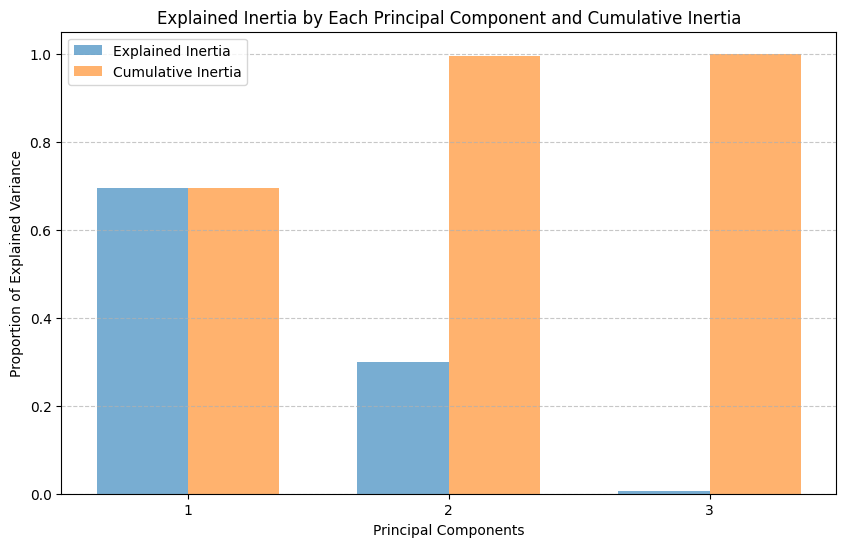

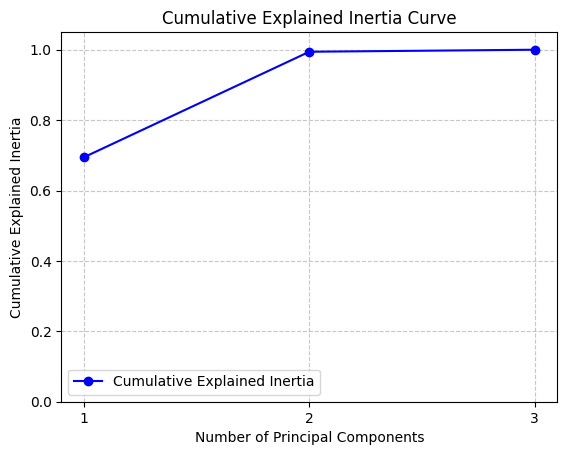

In [40]:
# We test the above code

bar_plot(eigenvalues)
plot_explained_inertia(eigenvalues)

In [41]:
# 4. Calculate the new coordinates of individual i on each of the components, giving Cij, which defines the quality of the individual's projection 𝑄𝑖𝑘.
# (k is the number of retained principal components) defined by: 𝑄𝑖𝑘 =∑ (𝐶𝑖𝑗)𝑘 2𝑗=1∑ (𝐶𝑖𝑝 𝑗𝑗=1)2

# Define a function to graphically represent a dataset in 3 dimensions.
# This function will be used in the projection function below and other functions in the following sections.

import plotly.graph_objs as go

def plot_3d(X, Y, Z, title):
    trace = go.Scatter3d(
        x=X,
        y=Y,
        z=Z,
        mode='markers',
        marker=dict(
            size=4,
            color=Z,               # Use Z for color
            colorscale='Viridis',  # Color palette
            opacity=0.8
        )
    )

    layout = go.Layout(
        title=title,
        scene=dict(
            xaxis_title='X axis',
            yaxis_title='Y axis',
            zaxis_title='Z axis'
        )
    )

    fig = go.Figure(data=[trace], layout=layout)
    fig.show()

# Define the function plot_projection to plot the projection results in any dimensional space.
def plot_projection(X_projected, Q):
    # Plot the projected points if the dimension is less than 4:
    if X_projected.shape[1] < 4:  # Check if the number of dimensions is less than 4
        if X_projected.shape[1] == 1:
            # Projection in 1D
            plt.figure(figsize=(8, 6))
            plt.scatter(x=X_projected[:, 0], y=np.zeros_like(X_projected[:, 0]), c=Q, cmap='viridis', edgecolor='k')
            plt.xlabel('Component 1')
            plt.title('Projection of individuals in the new space')
            plt.grid()
            plt.axis('equal')
            plt.show()
        elif X_projected.shape[1] == 2:
            # Projection in 2D
            plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Q, cmap='viridis', edgecolor='k')
            plt.xlabel('Component 1')
            plt.ylabel('Component 2')
            plt.colorbar(label='Projection Quality')
            plt.title('Projection of individuals in the new space')
            plt.grid()
            plt.axis('equal')
            plt.show()
        elif X_projected.shape[1] == 3:
            # Projection in 3D
            plot_3d(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], "Projection of individuals in the new space")

        plt.show()

    else:
        print("The projected dimension is 4 or higher, or plotting was declined; plot is ignored.")

def projection(X, selected_eigenvectors, plot):
    # Calculate the new expression of X in the space defined by the retained eigenvectors
    X_projected = np.dot(X, selected_eigenvectors)
    # Calculate the projection quality for each individual
    X_squared = X ** 2
    X_projected_squared = X_projected ** 2
    Q = X_projected_squared.sum(axis=1) / X_squared.sum(axis=1)

    if plot:
        plot_projection(X_projected, Q)

    return X_projected, Q


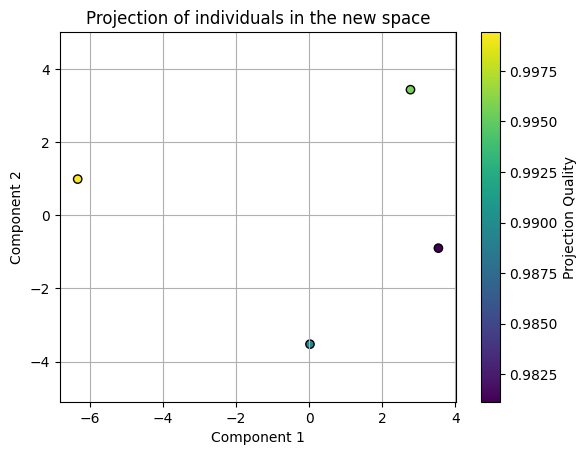

The matrix of coordinates projected on E is:
 [[ 2.77126827  3.43482906]
 [ 0.02274264 -3.52501753]
 [ 3.535318   -0.89895079]
 [-6.3293289   0.98913926]] 

The vector containing the projection quality of each individual on E is:
 [0.99567941 0.98915549 0.98113075 0.99942285]


In [42]:
# Testing the code above
eigenvectors_selected = eigenvectors[:, :2]  # Select the first two eigenvectors
eigenvalues_selected = eigenvalues[:2]       # Select the first two eigenvalues
X_projected, Q = projection(X_centered, eigenvectors_selected, True)
print("The matrix of coordinates projected on E is:\n", X_projected, 
      "\n\nThe vector containing the projection quality of each individual on E is:\n", Q)

In [43]:
# 5. The contribution of individual i to the inertia of the factorial axis j is defined by 𝛾𝑖𝑗=1𝑛(𝐶𝑖𝑗)^2/𝜆𝑗. This allows calculating the contribution and quality in the new subspace.

def individual_contribution(X_projected, eigenvalues_selected):
    # Calculations to create a matrix where element ij represents the contribution of the i-th term to the inertia along the j-th principal component.
    X_proj_2 = X_projected ** 2
    gamma = ((1 / X_projected.shape[0]) * X_proj_2) / eigenvalues_selected

    return gamma


We return the matrix gamma with coefficients representing gamma(i, j)

In [44]:
# Testing the code above
individual_contribution(X_projected, eigenvalues_selected) * 100

array([[9.56177061e+00, 3.40193508e+01],
       [6.43965926e-04, 3.58293003e+01],
       [1.55610232e+01, 2.33016995e+00],
       [4.98765622e+01, 2.82117899e+00]])

In [45]:
# 6. Verify that your first factorial plane is correct by comparing it with the R function that performs PCA: library(ade4)
# function dudi.pca(), for example.

from sklearn.decomposition import PCA

# Initialization and fitting of PCA
pca_val = PCA(0.8)  # 2 components for the first factorial plane
X_projected_val = pca_val.fit_transform(X_centered)

# Obtain eigenvalues (variance explained by each component)
eigenvalues_val = pca_val.explained_variance_

# Obtain eigenvectors (principal components)
eigenvectors_val = pca_val.components_

# Obtain cumulative explained variance
cumulative_explained_variance_val = np.cumsum(pca_val.explained_variance_ratio_)

# Display the results
print("Coordinates of individuals projected (first factorial plane):\n", X_projected_val)
print("Eigenvalues (variance explained by component):\n", eigenvalues_val)
print("Eigenvectors (principal components):\n", eigenvectors_val)
print("Cumulative explained variance:\n", cumulative_explained_variance_val)


Coordinates of individuals projected (first factorial plane):
 [[-2.77126827  3.43482906]
 [-0.02274264 -3.52501753]
 [-3.535318   -0.89895079]
 [ 6.3293289   0.98913926]]
Eigenvalues (variance explained by component):
 [20.07977423  8.67010274]
Eigenvectors (principal components):
 [[ 0.51077735  0.44640111  0.73473298]
 [-0.65409341  0.75639826 -0.00484655]]
Cumulative explained variance:
 [0.69440141 0.99423206]


Nous obtenons les mêmes résultats pour le premier plan factoriel en utilisant la fonction PCA() et notre méthode.

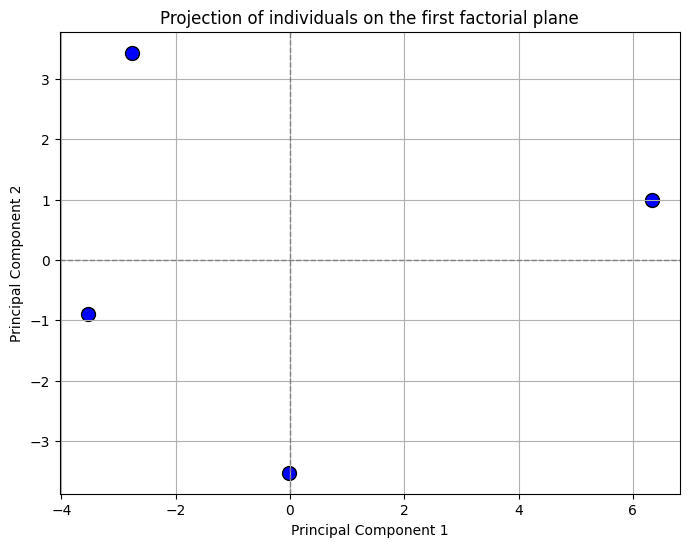

In [46]:
# 7. Graphically represent the new individuals in the new subspace according to the first and second planes
# retained (e.g., plot(CP1, CP2) or plot(CP1, CP3) …)

def plotting_1(X):
  # Plot points projected on the first factorial plane
  plt.figure(figsize=(8, 6))
  plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=100)  # Projected points
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('Projection of individuals on the first factorial plane')
  plt.axhline(0, color='grey', lw=1, ls='--')  # Horizontal line
  plt.axvline(0, color='grey', lw=1, ls='--')  # Vertical line
  plt.grid()
  plt.show()

plotting_1(X_projected_val)

# Part III

In [47]:
# 8.1 You need to write the script that generates this data, then test PCA on this data

# Parameters for Gaussian vectors
n = 300  # Size of each vector

# Generating Gaussian vectors
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
Z = np.random.normal(0, 1, n)

# Graphical Representation of our dataset
# Creation of the interactive 3D scatter plot

plot_3d(X, Y, Z, "Graphical Representation of Our Dataset")

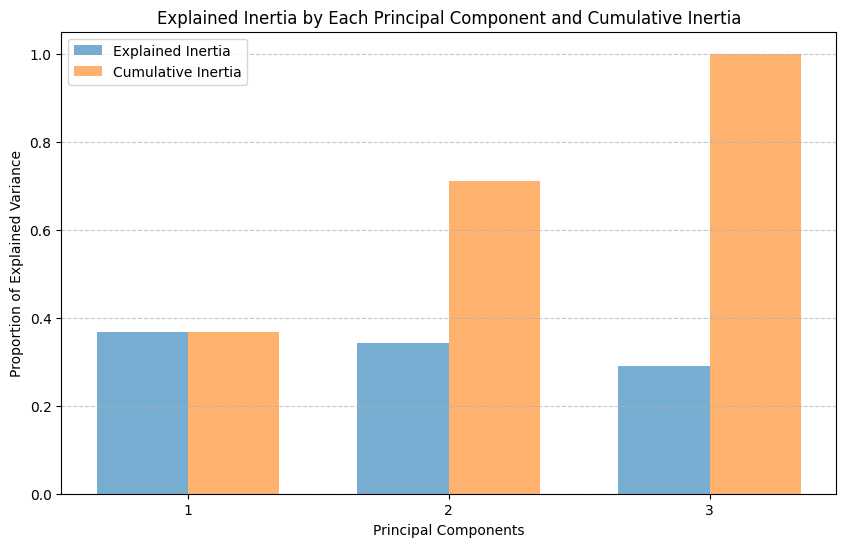

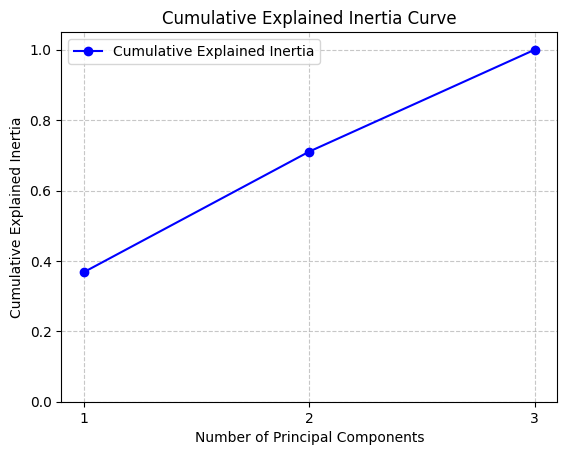

In [48]:
# Continuation of Step 8.1

# We concatenate the three generated Gaussian vectors
X_combined = np.column_stack((X, Y, Z))

# Step 1: Retrieve eigenvalues, eigenvectors, and centered X_combined
eigenvalues_combined, eigenvectors_combined, X_centered_combined = pca(X_combined)

# Step 2: Plot cumulative explained inertia to select principal components for our new space E
bar_plot(eigenvalues_combined)
plot_explained_inertia(eigenvalues_combined)


Comment: We observe that the three eigenvalues of the covariance matrix converge to the same value: 1. 
This is explained by the fact that the three coordinate vectors (X, Y, Z) are independent, centered, and standardized Gaussian vectors.
Since they are independent and follow a standard normal distribution, there is no preferred direction in which the variance would be greater.
Therefore, the variance equals 1 in all directions.

In [49]:
# Step 3: Select the principal components

# From the above charts, we see that we need the first 3 principal components to achieve a cumulative explained inertia greater than 80%.
# We therefore select the first 3 eigenvalues to create the new space E.
eigenvectors_selected_1 = eigenvectors_1[:, :3]
eigenvalues_selected_1 = eigenvalues_1[:3]

# Step 4: Project our samples onto the new space E. We also calculate the projection quality of each sample 
# and plot them in the new space:

X_projected_1, Q_1 = projection(X_1, eigenvectors_selected_1, True)

# Step 5: Calculate individual contributions
gamma_1 = individual_contribution(X_projected_1, eigenvalues_selected_1)
"""print(gamma_1)"""


'print(gamma_1)'

 We observe that this projection is essentially a rotation of the space, as the projected space 𝐸 retains the same dimension as the original space. Consequently, this projection does not provide any additional information. This is explained by the fact that the point cloud is isotropic, meaning its distribution is identical in all directions. In this context, PCA cannot reveal any preferred directions of variability because there are none: variability is uniformly distributed in all directions.

**N (number of samples) = 10**

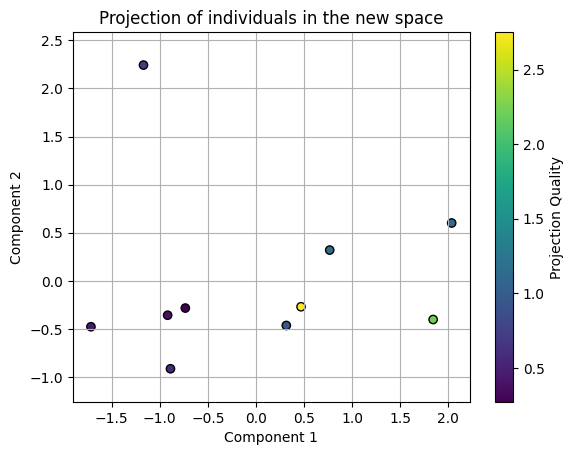

**N (number of samples) = 50**

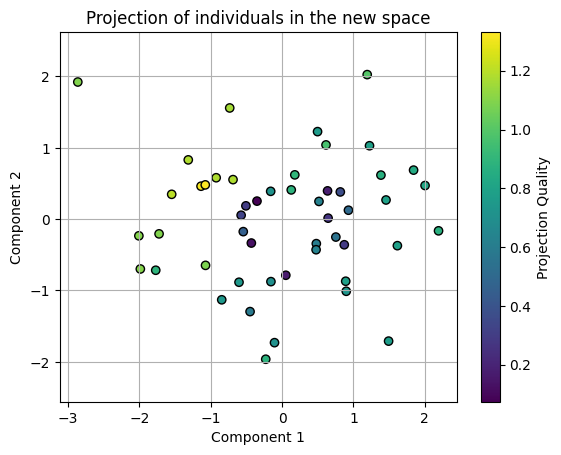

**N (number of samples) = 200**

**N (number of samples) = 800**

**N (number of samples) = 5000**

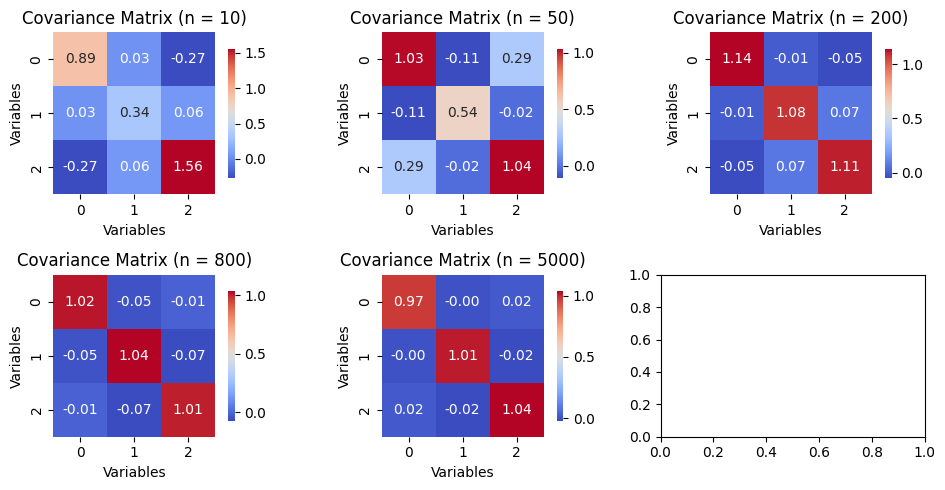

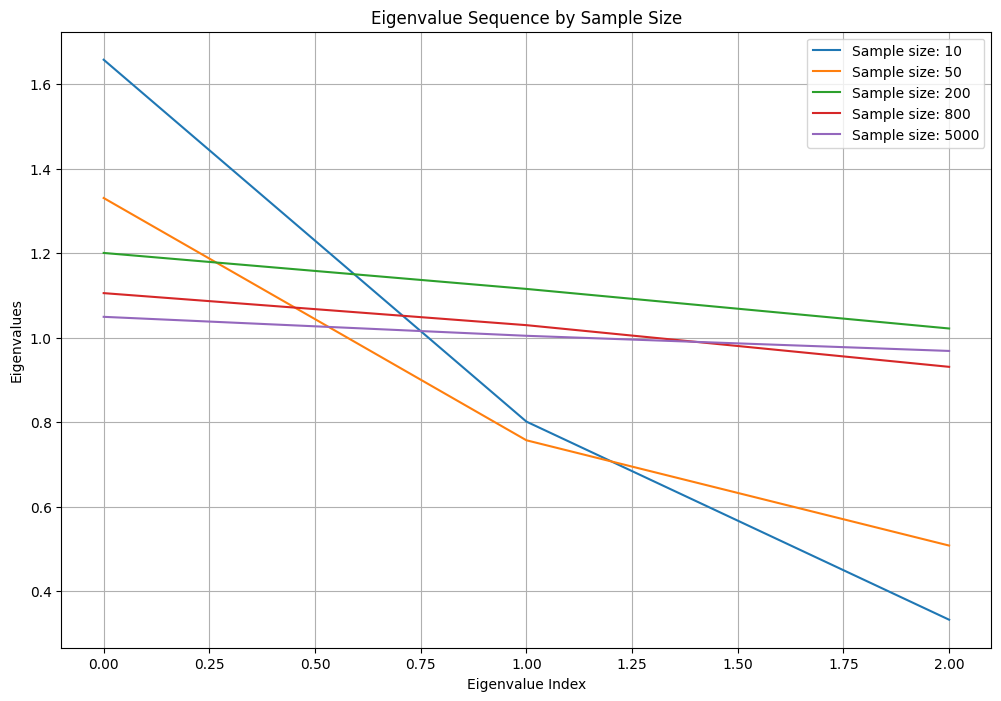

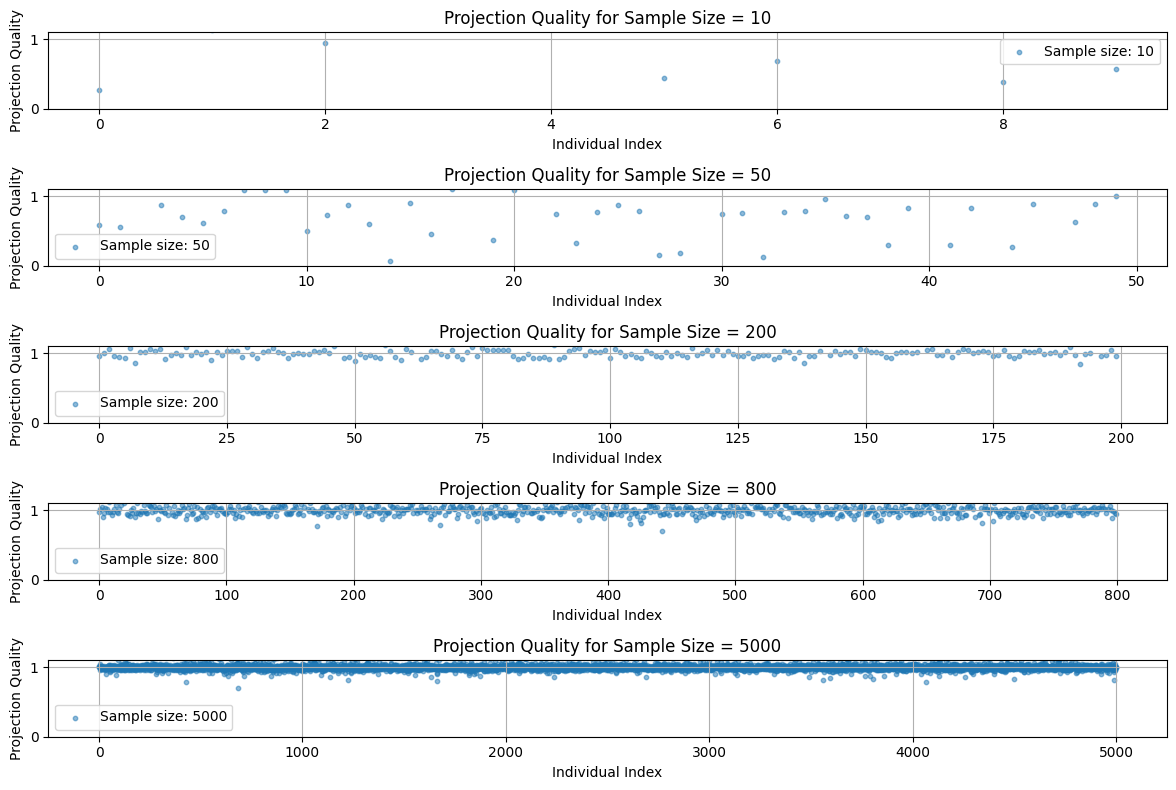

In [58]:
# 8.2 Based on sample size, observe the evolution of the covariance or correlation matrix,
# the sequence of eigenvalues, and the quality of individual projections. Interpret.

import seaborn as sns
import plotly.express as px
from IPython.display import display, Markdown

# Function to generate data
def generate_data(sample_size, n_features):
    return np.random.normal(0, 1, (sample_size, n_features))

# Parameters
n_features = 3
sample_sizes = [10, 50, 200, 800, 5000]

# Initialize lists to store results
covariances_iso = []
eigenvalues_list_iso = []
qualities_iso = []

# Loop for each sample size
for size in sample_sizes:
    # Generate data
    data = generate_data(size, n_features)

    # Calculate the covariance matrix
    cov_matrix, mean, variance, std_dev = get_info(data, visualize=False)
    covariances_iso.append(cov_matrix)

    # Retrieve eigenvalues of the covariance matrix of our dataset
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Add the eigenvalues to the storage list
    eigenvalues_list_iso.append(eigenvalues)

    # Fit PCA and select principal components to explain 80% of variance
    pca = PCA(0.80)  # Set criterion to 80%
    data_transformed = pca.fit_transform(data)

    # Calculate the quality of projection
    Q = (data_transformed ** 2).sum(axis=1) / (data ** 2).sum(axis=1)
    qualities_iso.append(Q)

    # Plot data projection onto new space E:
    # Automatic plotting with Plotly
    display(Markdown(f"**N (number of samples) = {size}**"))
    plot_projection(data_transformed, Q)

# Visualize the covariance matrix
fig, axs = plt.subplots(1 + len(sample_sizes) // 3, 3, figsize=(10, 5))
for i, cov_matrix in enumerate(covariances_iso):
    row, col = i // 3, i % 3
    sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axs[row, col], cbar_kws={"shrink": .8})
    axs[row, col].set_title(f"Covariance Matrix (n = {sample_sizes[i]})")
    axs[row, col].set_xlabel("Variables")
    axs[row, col].set_ylabel("Variables")
plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()

# Visualize eigenvalues
plt.figure(figsize=(12, 8))
for i, eigenvalues in enumerate(eigenvalues_list_iso):
    plt.plot(range(len(eigenvalues)), np.sort(eigenvalues)[::-1], label=f'Sample size: {sample_sizes[i]}')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalue Sequence by Sample Size')
plt.legend()
plt.grid()
plt.show()

# Visualize projection quality
plt.figure(figsize=(12, 8))
for i, Q in enumerate(qualities_iso):
    plt.subplot(len(qualities_iso), 1, i + 1)  # Create a subplot for each quality
    plt.scatter(range(len(Q)), Q, label=f'Sample size: {sample_sizes[i]}', alpha=0.5, s=10)
    plt.xlabel('Individual Index')
    plt.ylabel('Projection Quality')
    plt.title(f'Projection Quality for Sample Size = {sample_sizes[i]}')
    plt.legend()
    plt.grid()
    plt.ylim(0, 1.1)  # Set Y-axis limits

plt.tight_layout()  # Adjust subplots to avoid overlap
plt.show()


Evolution of the Covariance Matrix: We observe that the covariances between different variables tend to decrease and approach 0 as the number of samples increases. This is because the samples for each variable are generated independently and randomly, meaning their theoretical covariances are zero. These results are less distinct when the sample size (n) is small, as empirical parameter estimates are noisier with fewer samples, which can lead to significant variation among them. (*)

In parallel, the variance of each variable tends to converge to 1 as n increases. This is due to the fact that we generate samples from a normal distribution with a variance of 1. As n grows, the empirical estimate of variance gets closer to the theoretical variance for the reasons explained in (*).

Evolution of the Eigenvalue Sequence: As n increases, the three eigenvalues approach the same value: 1. This is because the three sample vectors follow the same normal distribution with unit variance, forming an isotropically distributed point cloud. There is no preferred direction in which the variance (the eigenvalues) would be greater in our dataset. Consequently, the eigenvalues of the covariance matrix all converge to 1 as n increases, for the reasons outlined in (*).

Evolution of the Projection Quality of Individuals: The average quality of individual projections strongly approaches 1. When n increases, the eigenvalues of the covariance matrix tend to converge to 1. As a result, the number of eigenvectors selected to form a space with explained variance above 0.8 is 3 for all values of n > 10. With a 3-dimensional space, the dataset’s dimensionality is not reduced, and the projection essentially results in a simple rotation. Consequently, the projection quality tends toward 1.

The small differences between 1 and the projection qualities arise because, with fewer data points, the eigenvectors are estimated less accurately, and thus, the projection basis axes derived from them are not perfectly aligned with the original axes. This results in projecting points onto a basis that is close to but not exactly a rotation of the original, which slightly affects the retained variance.

**N (number of samples) = 10**

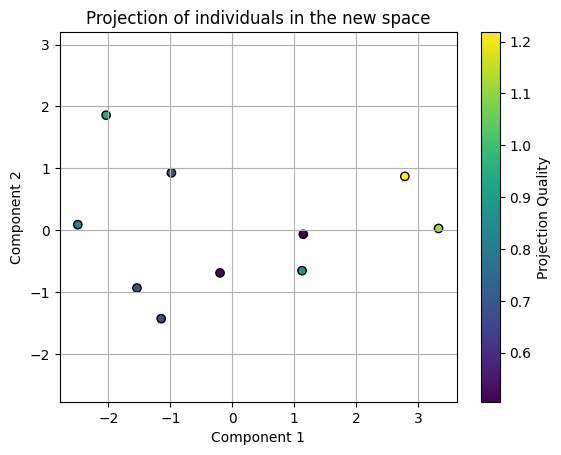

**N (number of samples) = 50**

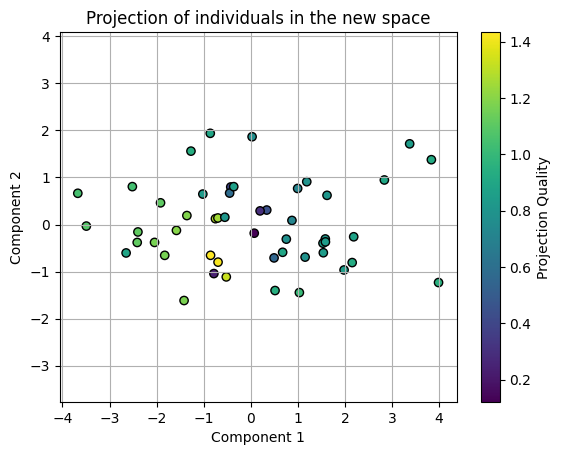

**N (number of samples) = 200**

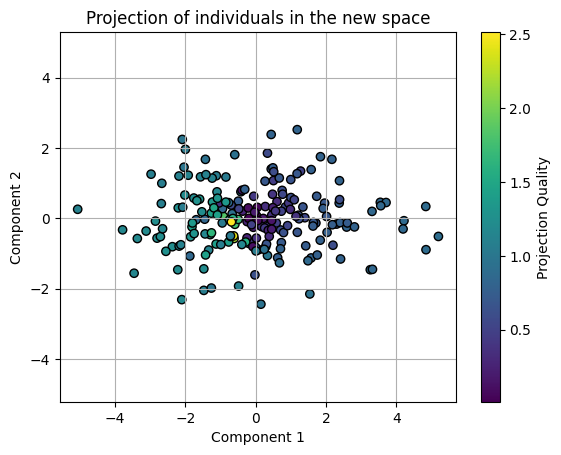

**N (number of samples) = 800**

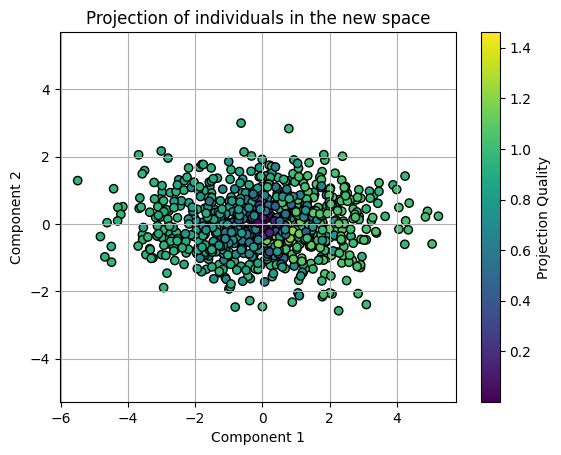

**N (number of samples) = 2400**

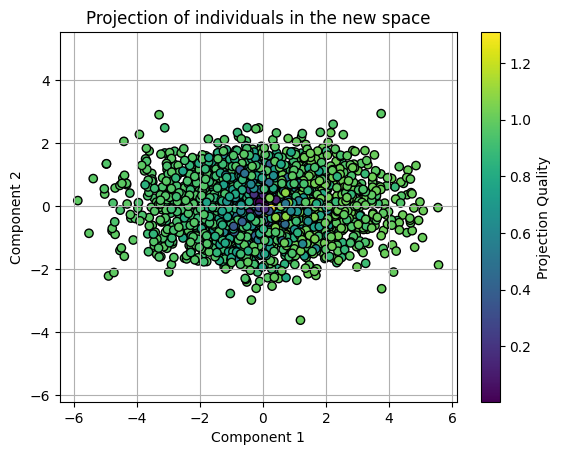

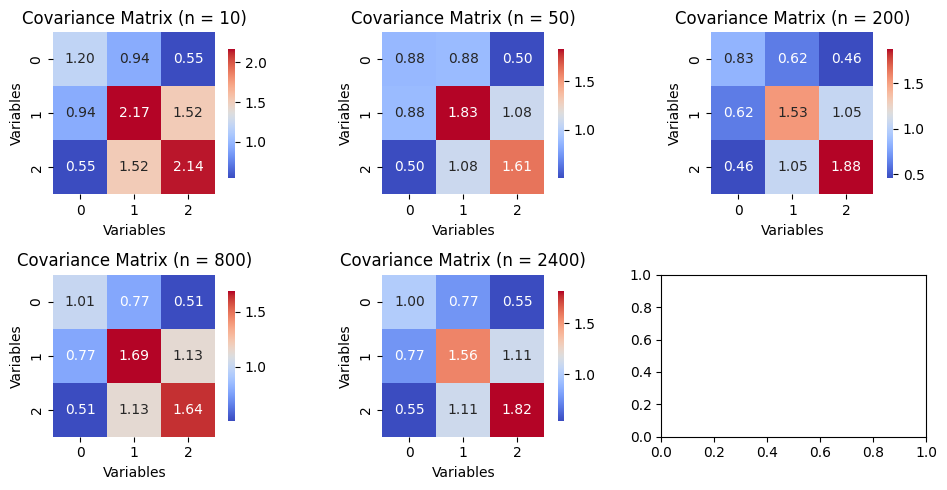

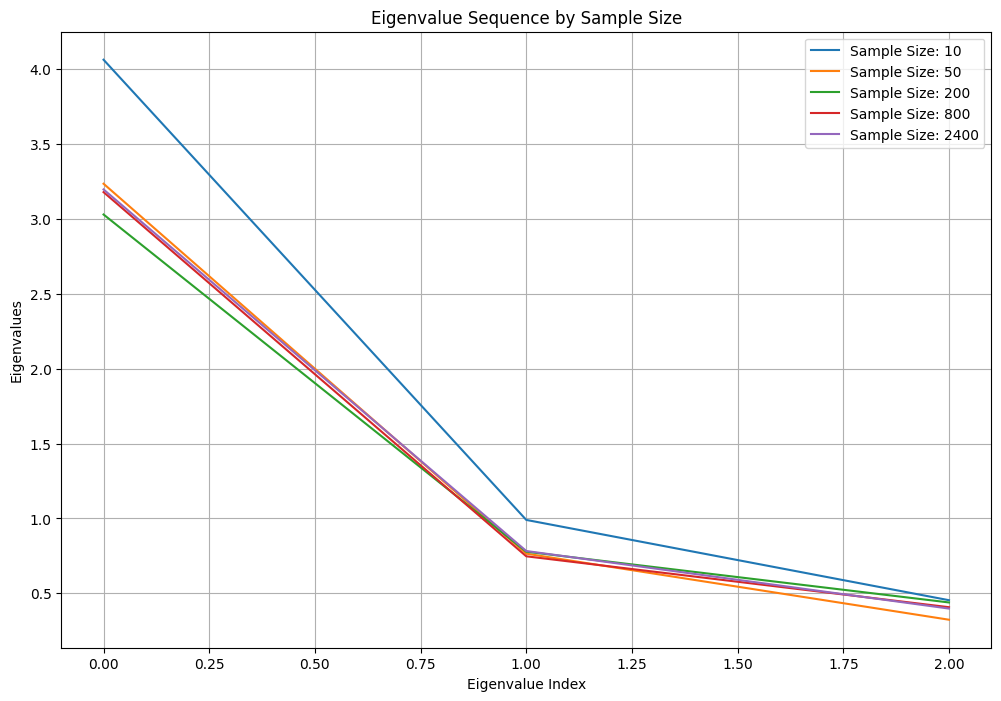

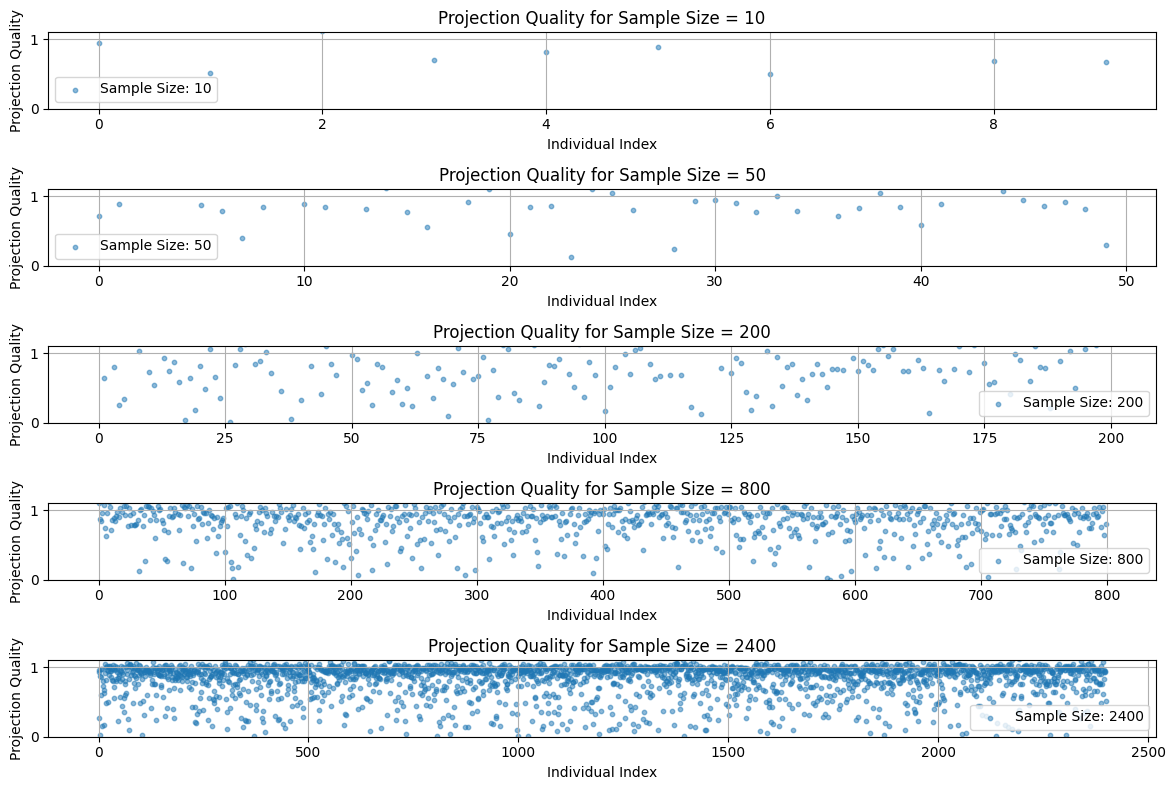

In [61]:
# 9.1 Test PCA on generated data and observe, depending on the sample size, 
# how the covariance or correlation matrix, the sequence of eigenvalues, and the quality 
# of individual projections evolve. Interpret results.

from IPython.display import display, Markdown

def generate_anisotropic_data(sample_size, n_features):

  # Generate data for X
  X = np.random.normal(0, 1, sample_size)
  # Generate Y as a function of X with strong correlation and add noise
  noise_Y = np.random.normal(0, 1, sample_size)  # Light noise
  Y = 0.8 * X + noise_Y  # Linear relationship between X and Y
  # Generate Z as a function of Y with strong correlation and add noise
  noise_Z = np.random.normal(0, 1, sample_size)  # Light noise
  Z = 0.7 * Y + noise_Z  # Linear relationship between Y and Z
  return np.column_stack([X, Y, Z])

# Parameters
n_features = 3
sample_sizes = [10, 50, 200, 800, 2400]

# Initialize lists to store results
covariances_anisotropic = []
eigenvalues_list_anisotropic = []
projection_qualities = []

# Loop for each sample size
for size in sample_sizes:
    # Display the sample size for which the point cloud and projection are shown
    display(Markdown(f"**N (number of samples) = {size}**"))

    # Generate data
    data = generate_anisotropic_data(size, n_features)

    # Plot the point cloud
    plot_3d(data[:, 0], data[:, 1], data[:, 2], "3D Representation of the Data Set")

    # Calculate the covariance matrix
    cov_matrix, mean, variance, std_dev = get_info(data, visualize=False)
    covariances_anisotropic.append(cov_matrix)

    # Retrieve eigenvalues of the covariance matrix of the dataset
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Add eigenvalues to the storage list
    eigenvalues_list_anisotropic.append(eigenvalues)

    # Perform PCA and select principal components for 80% of explained variance
    pca = PCA(0.80)  # Set criteria at 80%
    data_transformed = pca.fit_transform(data)

    # Calculate the quality of the projection
    Q = (data_transformed ** 2).sum(axis=1) / (data ** 2).sum(axis=1)
    projection_qualities.append(Q)

    # Plot the data projection in the new space E
    plot_projection(data_transformed, Q)

# Visualization of the covariance matrix
fig, axs = plt.subplots(1 + len(sample_sizes) // 3, 3, figsize=(10, 5))
for i, cov_matrix in enumerate(covariances_anisotropic):
  row, col = i // 3, i % 3
  sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axs[row, col], cbar_kws={"shrink": .8})
  axs[row, col].set_title(f"Covariance Matrix (n = {sample_sizes[i]})")
  axs[row, col].set_xlabel("Variables")
  axs[row, col].set_ylabel("Variables")
plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()

# Visualization of eigenvalues
plt.figure(figsize=(12, 8))
for i, eigenvalues in enumerate(eigenvalues_list_anisotropic):
    plt.plot(range(len(eigenvalues)), np.sort(eigenvalues)[::-1], label=f'Sample Size: {sample_sizes[i]}')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalue Sequence by Sample Size')
plt.legend()
plt.grid()
plt.show()

# Visualization of projection quality
plt.figure(figsize=(12, 8))
for i, Q in enumerate(projection_qualities):
    plt.subplot(len(projection_qualities), 1, i + 1)  # Create a subplot for each quality
    plt.scatter(range(len(Q)), Q, label=f'Sample Size: {sample_sizes[i]}', alpha=0.5, s=10)
    plt.xlabel('Individual Index')
    plt.ylabel('Projection Quality')
    plt.title(f'Projection Quality for Sample Size = {sample_sizes[i]}')
    plt.legend()
    plt.grid()
    plt.ylim(0, 1.1)  # Set y-axis limits between 0 and 1.1 for better visualization

plt.tight_layout()  # Adjust subplots to avoid overlap
plt.show()

# Generate Gaussian vectors
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
Z = np.random.normal(0, 1, n)

# Graphical representation of our dataset
# Creation of interactive 3D scatter plot

plot_3d(X, Y, Z, "Graphical Representation of Our Dataset")


Evolution of the Covariance Matrix:

We observe that the values in the covariance matrix tend toward the theoretical values of covariances and variances of the different variables. These values stem from the relationships established between X, Y, and Z when constructing the dataset. This convergence, as n becomes large, is explained by the same reasons mentioned previously (see (*)).

Eigenvalue Cascade:

Regardless of the value of n, the three eigenvalues show significant variance. Since some of our variables are correlated, the point cloud is stretched along a certain direction. In this direction, the variance (eigenvalue) of our point cloud is considerably higher. This is why we see such disparities in the three eigenvalues. These results are less clear when n is small because noise disrupts the empirical calculation of our eigenvalues and tends to homogenize them.

Projection Quality:

The projection quality of our samples seems to approach 1 as n increases. This is because, as the dataset grows, the estimation of the optimal projection plane improves, resulting in better projection quality.

<h2>PCA on a NORMALIZED sample</h2>

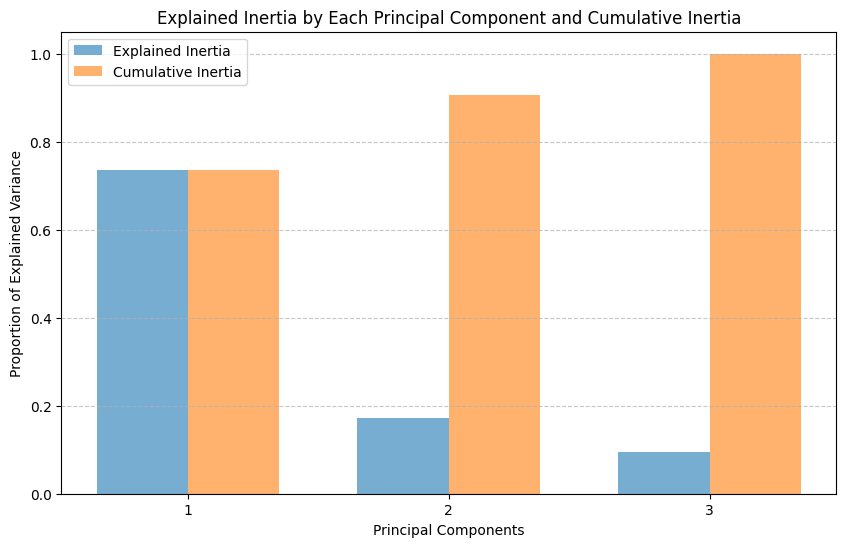

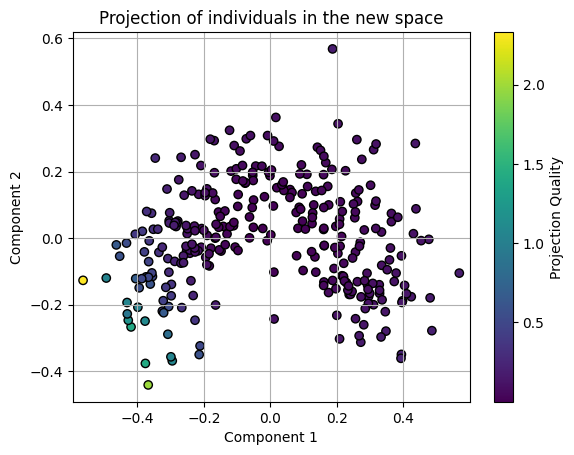

<h2>PCA on a NON-normalized sample</h2>

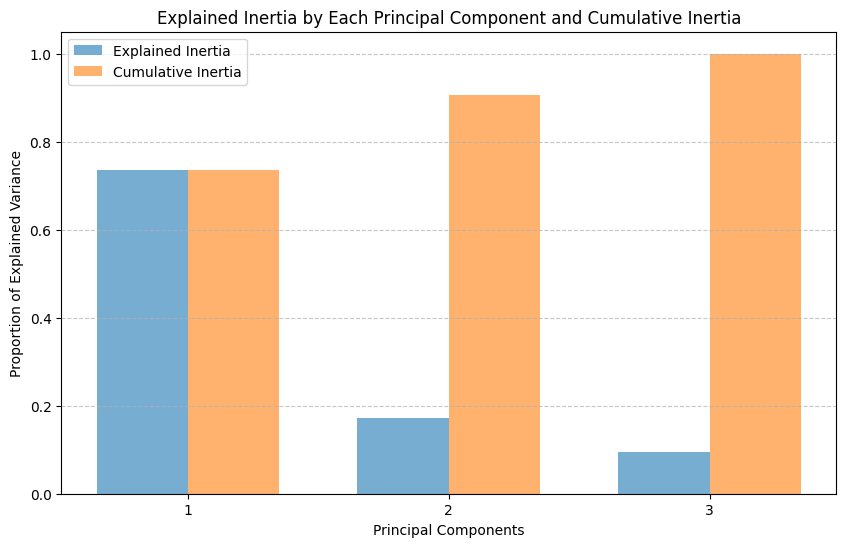

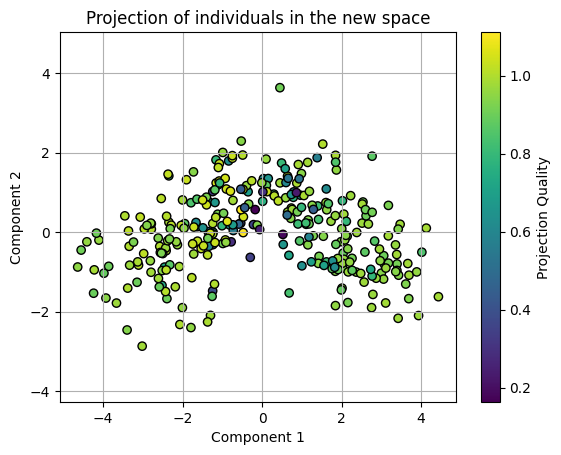

In [63]:
# Continuation of 9.1 (With Min-Max Normalization)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def test_pca(normalize=True, explained_variance_ratio=0.8):
    if normalize == False:
      display(Markdown(f"<h2>PCA on a NON-normalized sample</h2>"))
    else:
      display(Markdown(f"<h2>PCA on a NORMALIZED sample</h2>"))

    # Data generation
    np.random.seed(3)  # For reproducibility
    n = 300
    x = np.sort(np.random.normal(0, 1, n))
    y = np.random.normal(0, 1, n)
    z = np.random.normal(0, 1, n) + np.arctan2(x, y)
    data = pd.DataFrame({'x': x, 'y': y, 'z': z})

    # Normalization if specified
    if normalize:
        scaler = MinMaxScaler(feature_range=(0, 1))
        data_transformed = scaler.fit_transform(data)
    else:
        data_transformed = data.values

    plot_3d(data_transformed[:,0], data_transformed[:,1], data_transformed[:,2], "Representation of the dataset")
    
    # Covariance matrix calculation
    cov_matrix, mean, var, std_dev = get_info(data, visualize=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]

    # Display the variance explained by each component
    bar_plot(sorted_eigenvalues)

    # Performing PCA
    pca = PCA(explained_variance_ratio)
    data_pca = pca.fit_transform(data_transformed)

    # Projection quality calculation
    Q = (data_pca ** 2).sum(axis=1) / (data_transformed ** 2).sum(axis=1)

    # Plotting the projection in the new space
    plot_projection(data_pca, Q)

# Using the function with and without normalization
test_pca(normalize=True)   # With normalization
test_pca(normalize=False)  # Without normalization




We observe that the projection quality is worse for the dataset normalized with the Min-Max method. We will therefore try using Standard normalization instead. These poor results can be explained by the fact that Min-Max normalization compresses the data in all three dimensions without ensuring equal scaling. As a result, the normalized data no longer accurately reflects the original helical structure.

Consequently, PCA may fail to capture the significant directions of variance effectively, which impacts the quality of the projection.

**PCA on a NORMALIZED sample**

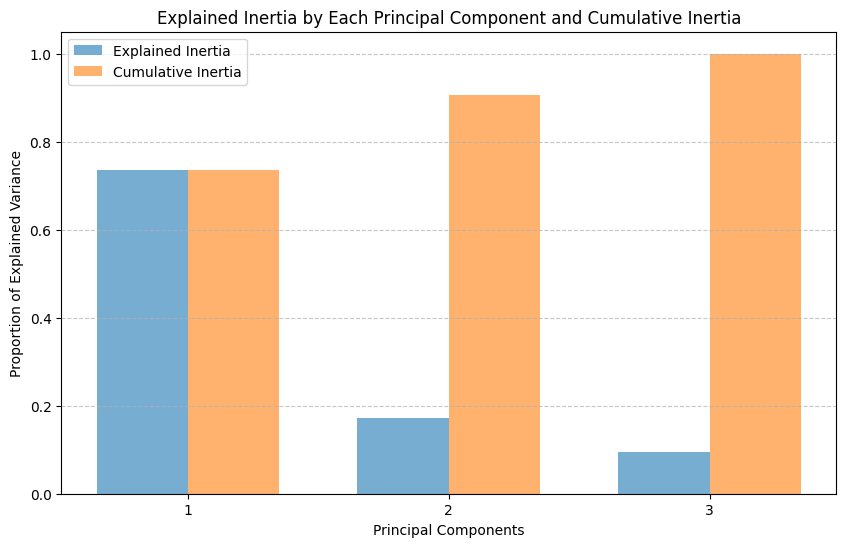

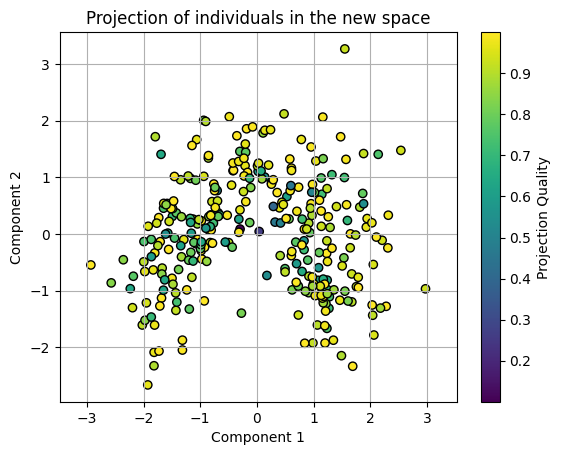

**PCA on an UNNORMALIZED sample**

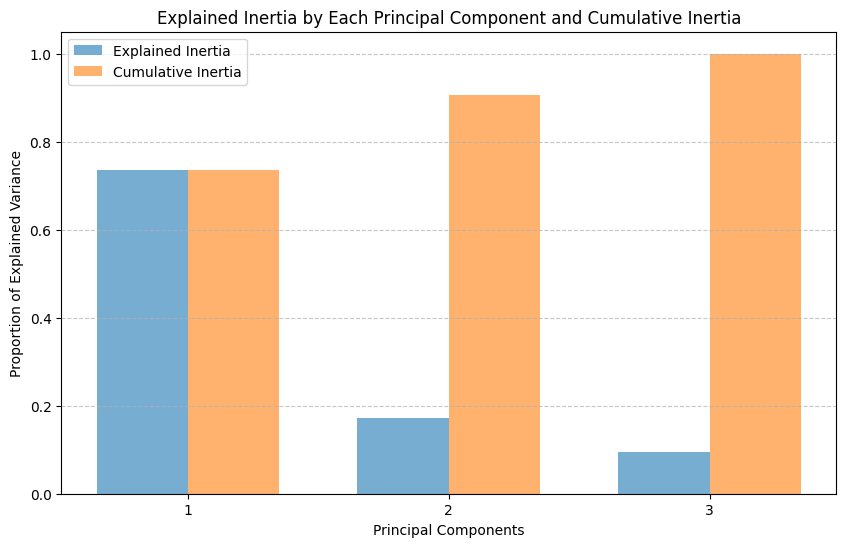

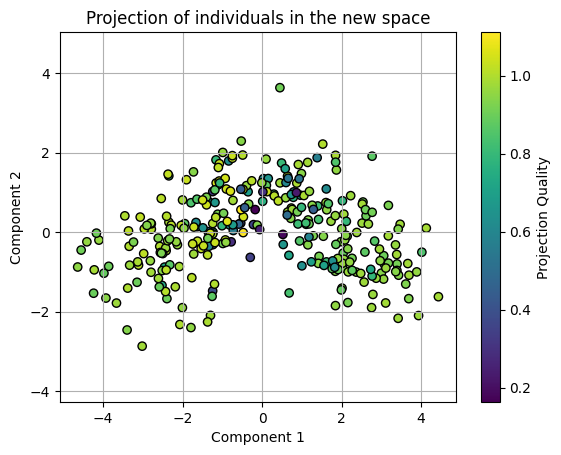

In [64]:
# Continuation of 9.1 (With Standard normalization)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def test_pca(normalize=True, explained_variance_ratio=0.8):
    if normalize == False:
        display(Markdown(f"**PCA on an UNNORMALIZED sample**"))
    else:
        display(Markdown(f"**PCA on a NORMALIZED sample**"))

    # Data generation
    np.random.seed(3)
    n = 300
    x = np.sort(np.random.normal(0, 1, n))
    y = np.random.normal(0, 1, n)
    z = np.random.normal(0, 1, n) + np.arctan2(x, y)
    data = pd.DataFrame({'x': x, 'y': y, 'z': z})

    # Normalization if specified
    if normalize:
        scaler = StandardScaler()
        data_transformed = scaler.fit_transform(data)
    else:
        data_transformed = data.values

    plot_3d(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2], "Dataset Representation")
    # Covariance matrix calculation
    cov_matrix, mean_vals, variance_vals, std_dev_vals = get_info(data, visualize=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]

    # Display explained variance by each component
    bar_plot(sorted_eigenvalues)

    # PCA execution
    pca = PCA(explained_variance_ratio)
    data_pca = pca.fit_transform(data_transformed)

    # Projection quality calculation
    Q = (data_pca ** 2).sum(axis=1) / (data_transformed ** 2).sum(axis=1)

    # Plot projection in the new space
    plot_projection(data_pca, Q)


# Function usage with and without normalization
test_pca(normalize=True)   # With normalization
test_pca(normalize=False)  # Without normalization


PCA on this dataset, normalized using StandardScaler, yields better results than when using Min-Max normalization. With StandardScaler, the inherent characteristics of the spiral shape are better captured by PCA, as centering around 0 and equalizing the scales provide a more accurate representation of the helical structure.

Moreover, with this normalization technique, the projection quality of the normalized data is better than for the non-normalized data. This is because the variance of a variable is influenced by the scale or range in which the data is represented. If the scales of the dataset’s variables differ greatly, it will create artificial disparities between the variances of the variables.

PCA relies on each variable's variance to identify the principal projection axes. If the variables are not normalized, those with higher standard deviations or larger ranges will dominate the analysis, regardless of their true contribution to the data structure. This skews the identification of the axes with the highest variance.

By normalizing the dataset, we protect against this phenomenon and ensure that we identify the best possible projection plane.

[[ 0.22301415 -0.41067998  0.20295406]
 [ 0.72572913  0.58534997  0.78256825]
 [-0.01937808  0.22475224  1.04538581]
 ...
 [ 7.50207582  6.35258919  4.2984409 ]
 [ 7.01493446  6.80130389  3.12180065]
 [ 7.44853554  5.37722111  4.59839479]]


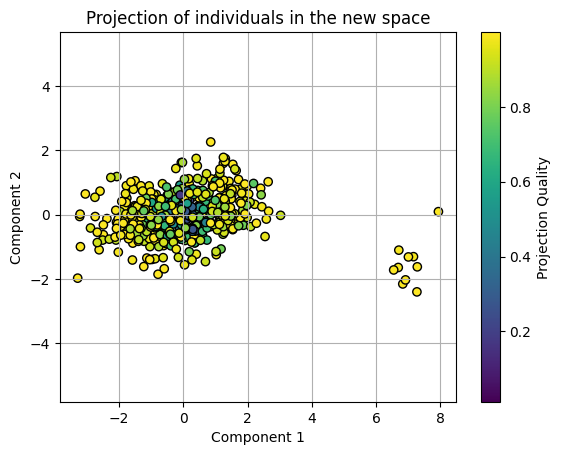

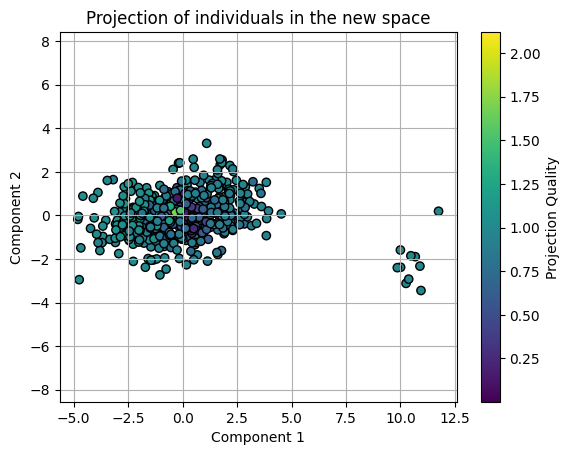

In [66]:
# 10. Extremal Points

# Function to add outlier data
def add_outliers(n_outliers, data):
  outliers_x = np.random.uniform(low=7, high=9, size=n_outliers)  # Generate outliers for x
  # Generate y coordinates of outliers based on the value of X
  noise_y = np.random.normal(0, 1, n_outliers)  # Light noise
  outliers_y = 0.8 * outliers_x + noise_y  # Linear relationship between X and Y
  # Generate z coordinates of outliers based on the value of Y
  noise_z = np.random.normal(0, 1, n_outliers)  # Light noise
  outliers_z = 0.7 * outliers_y + noise_z  # Linear relationship between Y and Z
  # Concatenate our 3 columns of coordinates
  outliers_concat = np.column_stack([outliers_x, outliers_y, outliers_z])
  # Return the dataset with added outliers
  return np.vstack((data, outliers_concat))  # Note the order here

# Parameters
n_features = 3
sample_size = 500

# Generate the data
data = generate_anisotropic_data(sample_size, n_features)

# Add outliers
data_with_outliers = add_outliers(10, data)

print(data_with_outliers)

# Perform standard scaling
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_with_outliers)

# Perform PCA on scaled and unscaled data
# Plot our data cloud
plot_3d(data_normalized[:,0], data_normalized[:,1], data_normalized[:,2], "3D Representation of the Normalized Dataset")
plot_3d(data_with_outliers[:,0], data_with_outliers[:,1], data_with_outliers[:,2], "3D Representation of the Centered Dataset")

# Fit PCA and select principal components for 80% explained variance
pca_normalized = PCA(0.80)  # Set the criterion at 80%
pca_centered = PCA(0.80)    # Set the criterion at 80%
data_transformed_normalized = pca_normalized.fit_transform(data_normalized)
data_transformed_centered = pca_centered.fit_transform(data_with_outliers)

# Calculate projection quality
Q_normalized = (data_transformed_normalized ** 2).sum(axis=1) / (data_normalized ** 2).sum(axis=1)
Q_centered = (data_transformed_centered ** 2).sum(axis=1) / (data_with_outliers ** 2).sum(axis=1)

# Plot the projection of our data in the new space E
plot_projection(data_transformed_normalized, Q_normalized)
plot_projection(data_transformed_centered, Q_centered)


We observe that when our dataset contains extreme values, normalization allows for a higher-quality PCA. Indeed, the projection quality of individuals is significantly better when the data has been normalized. This is because standard normalization reduces the influence of extreme values in the calculation of eigenvalues. This occurs because the normalization process reduces the gaps between extreme values and others, thus minimizing the negative impact of outliers on the variance calculations.

